In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# from tqdm import tqdm
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Theft Data.csv'
df = pd.read_csv(file_path)
df.head(10)

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.000000,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.000000,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
5,5,22.182649,3.586221,0.013197,0.0,4.589925,8.1892,130.564942,121.623185,8.34970,0.592057,FullServiceRestaurant,Normal
6,6,38.131845,3.586221,0.007371,0.0,9.179851,19.4245,140.435454,117.967915,16.69940,5.768139,FullServiceRestaurant,Normal
7,7,45.597278,3.586221,0.007450,0.0,9.179851,26.9147,135.456017,105.213458,25.04910,5.193459,FullServiceRestaurant,Normal
8,8,45.603647,3.586221,0.000000,0.0,9.179851,26.9147,145.575077,106.407810,33.39880,5.768467,FullServiceRestaurant,Normal
9,9,38.113761,3.586221,0.000000,0.0,9.179851,19.4245,147.695901,116.879014,25.04910,5.767787,FullServiceRestaurant,Normal


In [ ]:
df.shape

(560655, 13)

In [ ]:
df['Class'].unique()

array(['FullServiceRestaurant', 'Hospital', 'LargeHotel', 'LargeOffice',
       'MediumOffice', 'MidriseApartment', 'OutPatient', 'PrimarySchool',
       'QuickServiceRestaurant', 'SecondarySchool', 'SmallHotel',
       'SmallOffice', 'Stand-aloneRetail', 'StripMall', 'SuperMarket',
       'Warehouse', '0'], dtype=object)

In [ ]:
df['Class'].nunique()

17

In [ ]:
df['theft'].unique()

array(['Normal', 'Theft5', 'Theft6', 'Theft2', 'Theft3', 'Theft4',
       'Theft1'], dtype=object)

In [ ]:
df['theft'].nunique()

7

In [ ]:
df.columns

Index(['0', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)', 'Class', 'theft'],
      dtype='object')

In [ ]:
df[(df['Class'] == 'FullServiceRestaurant') & (df['theft'] == 'Theft1')]

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
960,960,8.877576,1.442347,0.0,0.0,1.846028,3.293626,43.273753,38.912137,1.343271,3.018345,FullServiceRestaurant,Theft1
961,961,5.891248,0.000000,0.0,0.0,0.615343,3.012494,1.581403,0.000000,1.343271,0.238132,FullServiceRestaurant,Theft1
962,962,5.900708,0.000000,0.0,0.0,0.615343,3.012494,1.351315,0.000000,1.343271,0.008044,FullServiceRestaurant,Theft1
963,963,5.905636,0.000000,0.0,0.0,0.615343,3.012494,1.581391,0.000000,1.343271,0.238120,FullServiceRestaurant,Theft1
964,964,6.172692,0.000000,0.0,0.0,0.615343,3.012494,1.351315,0.000000,1.343271,0.008044,FullServiceRestaurant,Theft1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428770,428770,19.291339,2.014648,0.0,0.0,4.570331,9.670788,43.355097,19.210049,16.628110,7.516938,FullServiceRestaurant,Theft1
428771,428771,19.274665,2.014648,0.0,0.0,4.570331,9.670788,45.697793,22.722925,16.628110,6.346758,FullServiceRestaurant,Theft1
428772,428772,19.230390,2.014648,0.0,0.0,4.570331,9.670788,48.006885,28.892597,12.471082,6.643205,FullServiceRestaurant,Theft1
428773,428773,19.170032,2.014648,0.0,0.0,4.570331,9.670788,46.872447,32.794238,8.314055,5.764155,FullServiceRestaurant,Theft1


In [ ]:
df['total'] = df['Electricity:Facility [kW](Hourly)'] + df['Fans:Electricity [kW](Hourly)'] + df['Cooling:Electricity [kW](Hourly)'] + df['Heating:Electricity [kW](Hourly)'] + df['InteriorLights:Electricity [kW](Hourly)'] + df['InteriorEquipment:Electricity [kW](Hourly)'] + df['Gas:Facility [kW](Hourly)'] + df['Heating:Gas [kW](Hourly)'] + df['InteriorEquipment:Gas [kW](Hourly)']+ df['Water Heater:WaterSystems:Gas [kW](Hourly)']
df['new theft'] = np.where(df['theft'] == 'Normal', 'Normal', 'Theft')
df.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft,total,new theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal,311.573129,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,30.389693,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,30.409502,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal,31.561846,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,30.564729,Normal


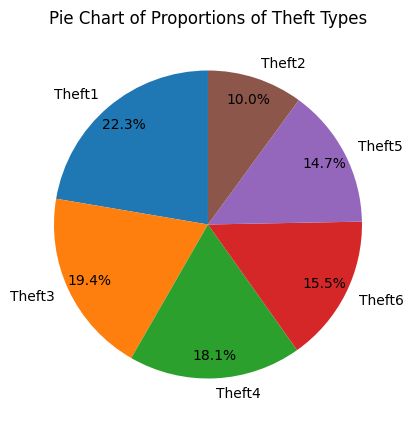

In [ ]:
df_theft_count = df['theft'].value_counts().reset_index()
df_theft_count.rename(columns = {'index': 'theft type', 'theft' : 'count'}, inplace = True)
# df_avg = df.groupby('theft')['total'].mean().reset_index()
# df_avg.rename(columns = {'theft': 'theft type', 'total' : 'average'}, inplace = True)
# df_theft = pd.merge(df_theft_count, df_avg, on = 'theft type')
df_theft_count = df_theft_count[df_theft_count['theft type'] != 'Normal']
plt.figure(figsize=(8, 5))
plt.pie(x=df_theft_count['count'], labels=df_theft_count['theft type'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Pie Chart of Proportions of Theft Types')
plt.show()

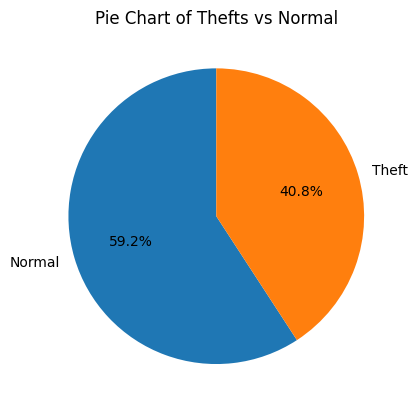

In [ ]:
df_theft_count = df['new theft'].value_counts().reset_index()
df_theft_count.rename(columns = {'index': 'theft type', 'new theft' : 'count'}, inplace = True)
plt.pie(x=df_theft_count['count'], labels=df_theft_count['theft type'], autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Thefts vs Normal')
plt.show()

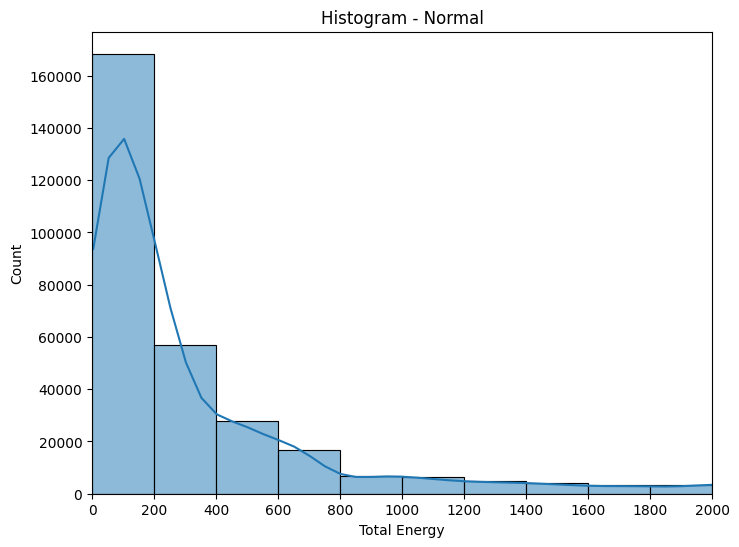

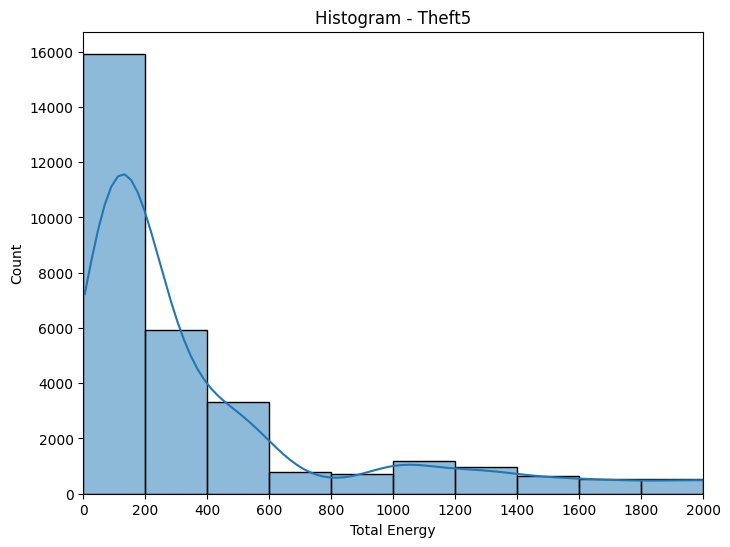

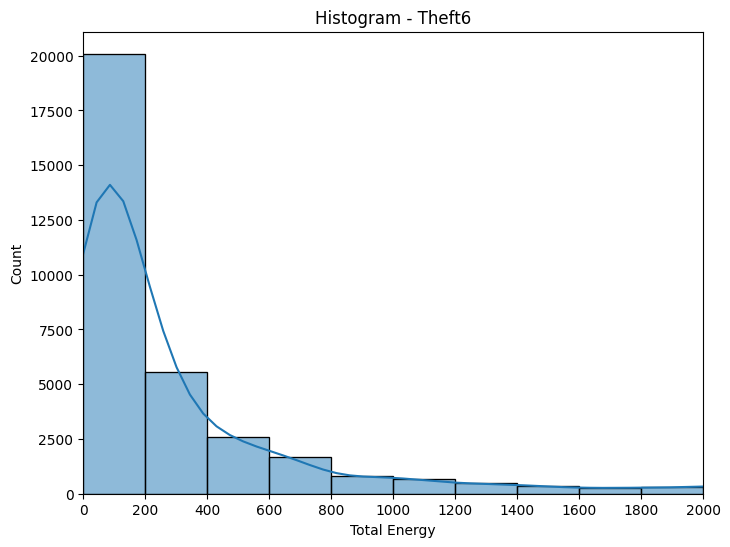

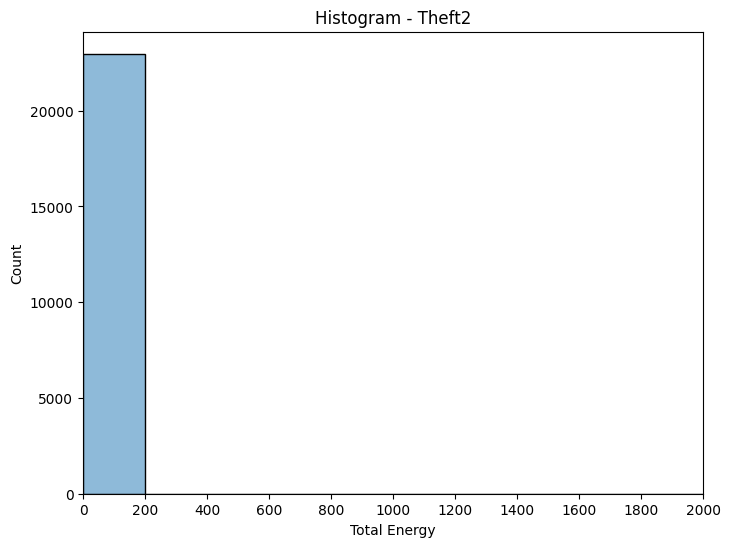

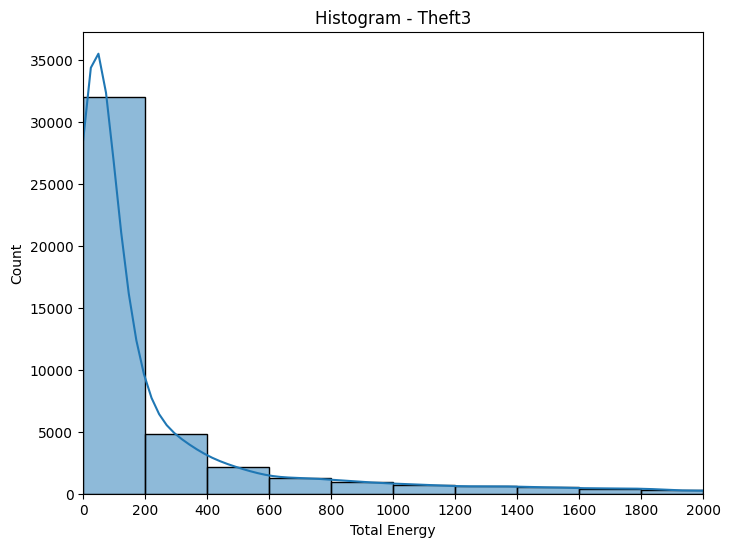

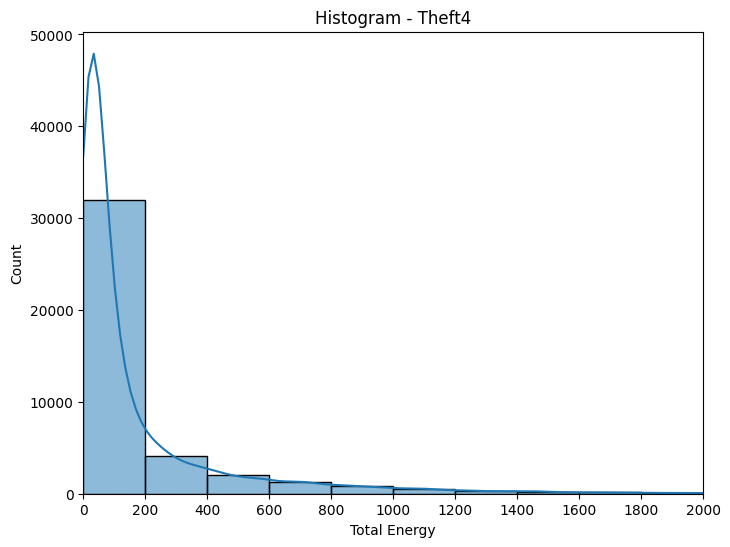

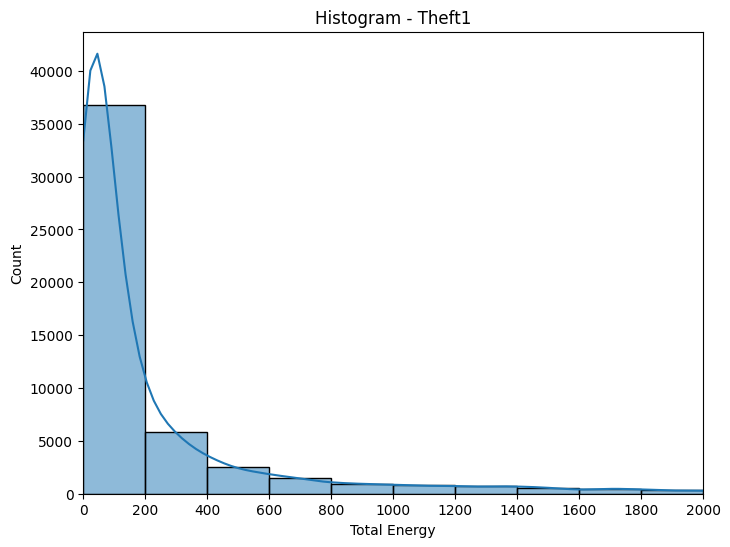

In [ ]:
bin_edges = [i * 200 for i in range(11)]  # Adjust the number of bins as needed

# Set the desired x-axis limits
min_value, max_value = 0, 2000

for theft in df['theft'].unique():
    df_temp = df[df['theft'] == theft]

    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_temp, x='total', kde=True, bins=bin_edges)

    # Set the x-axis ticks to match the bin edges
    plt.xticks(bin_edges)

    # Set the x-axis limits for consistency
    plt.xlim(min_value, max_value)
    plt.xlabel('Total Energy')
    plt.title(f'Histogram - {theft}')
    plt.show()

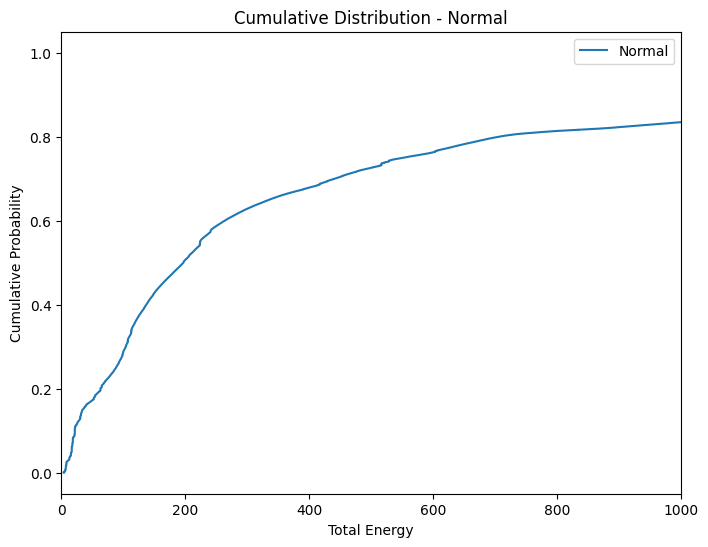

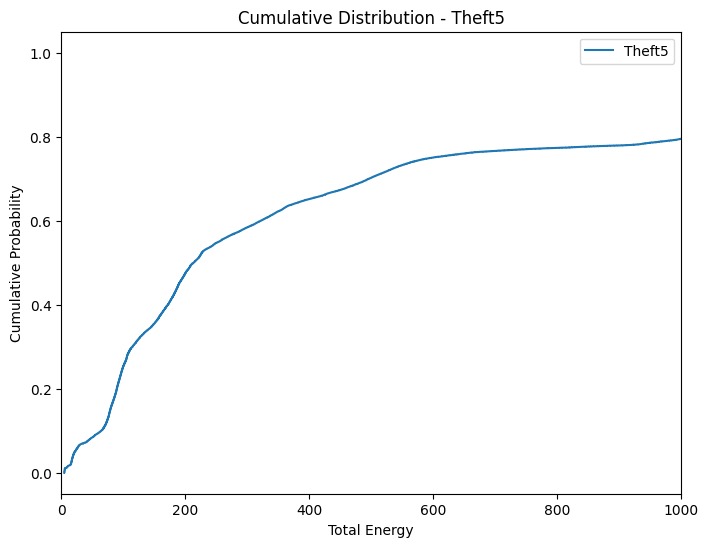

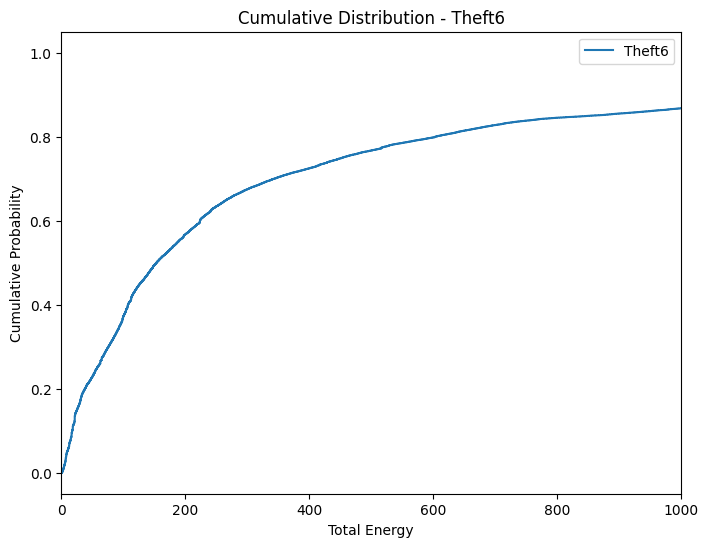

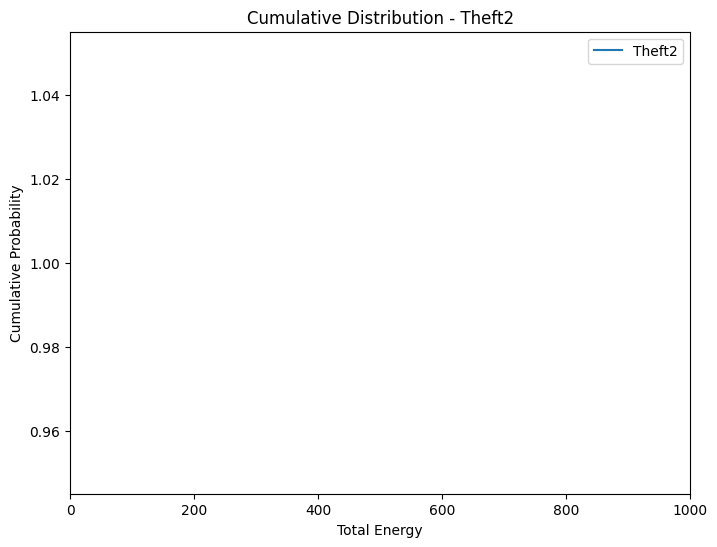

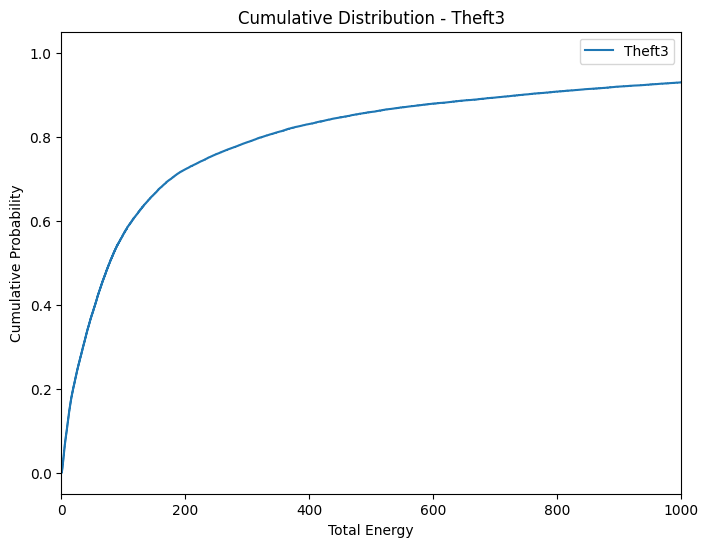

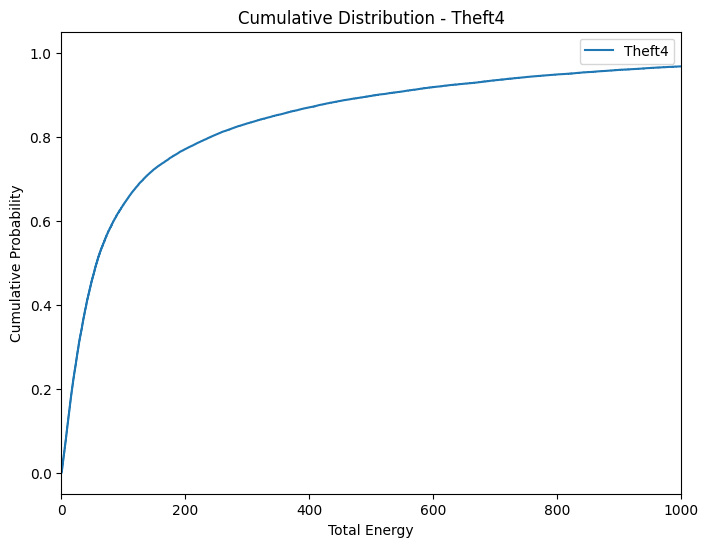

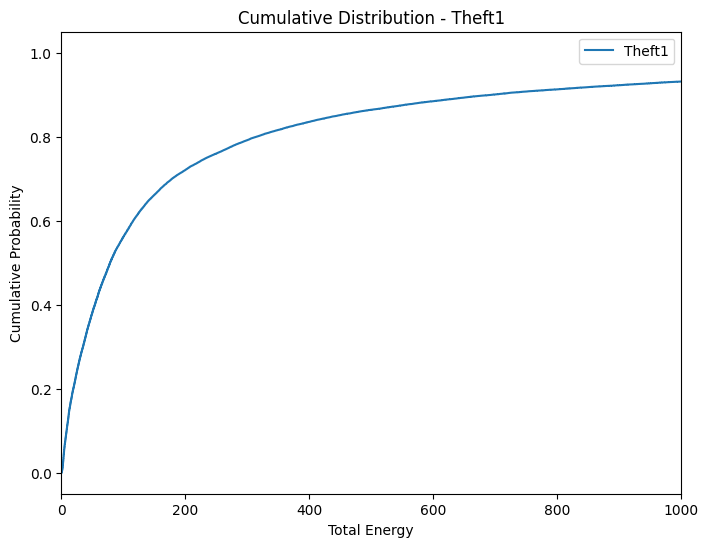

In [ ]:
for theft in df['theft'].unique():
    df_temp = df[df['theft'] == theft]

    # Create a cumulative distribution plot
    plt.figure(figsize=(8, 6))

    # Compute the empirical cumulative distribution function (ECDF)
    ecdf = sm.distributions.ECDF(df_temp['total'])

    # Plot the ECDF
    x = np.linspace(min(df_temp['total']), max(df_temp['total']), num=len(df_temp['total']))
    y = ecdf(x)

    plt.step(x, y, label=theft)

    # Set x-axis range
    min_value, max_value = 0, 1000
    plt.xlim(min_value, max_value)

    # Add labels and title
    plt.xlabel('Total Energy')
    plt.ylabel('Cumulative Probability')
    plt.title(f'Cumulative Distribution - {theft}')
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
df.columns

Index(['0', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)', 'Class', 'theft', 'total',
       'new theft'],
      dtype='object')

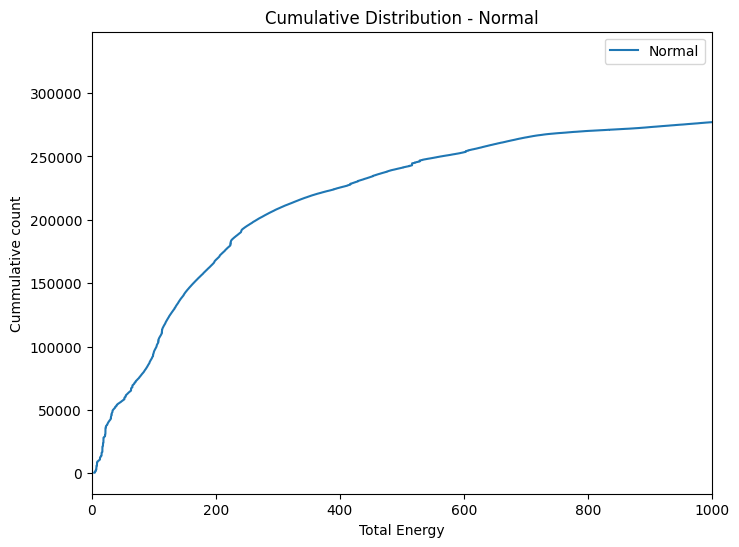

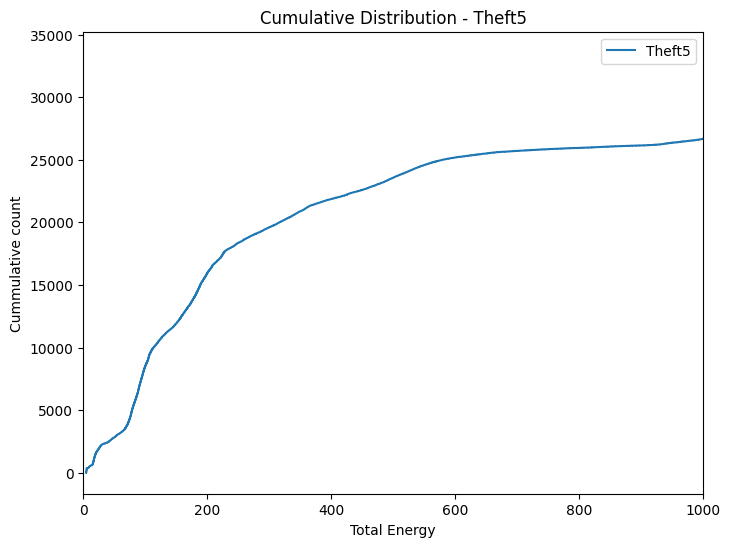

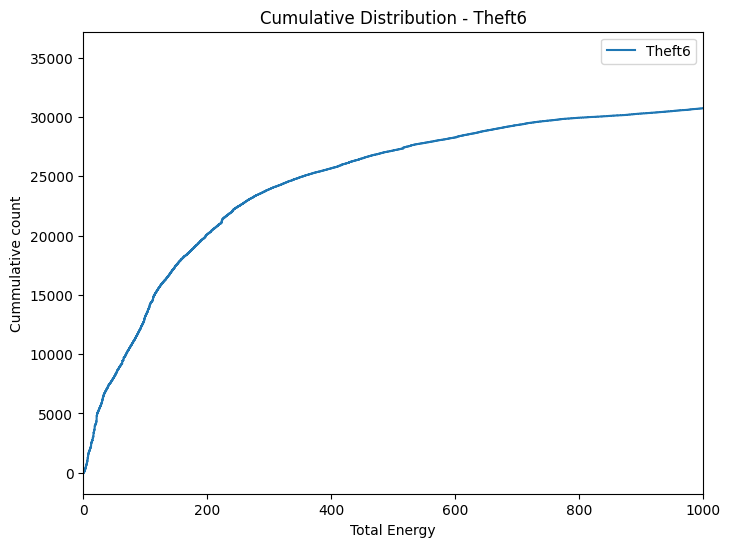

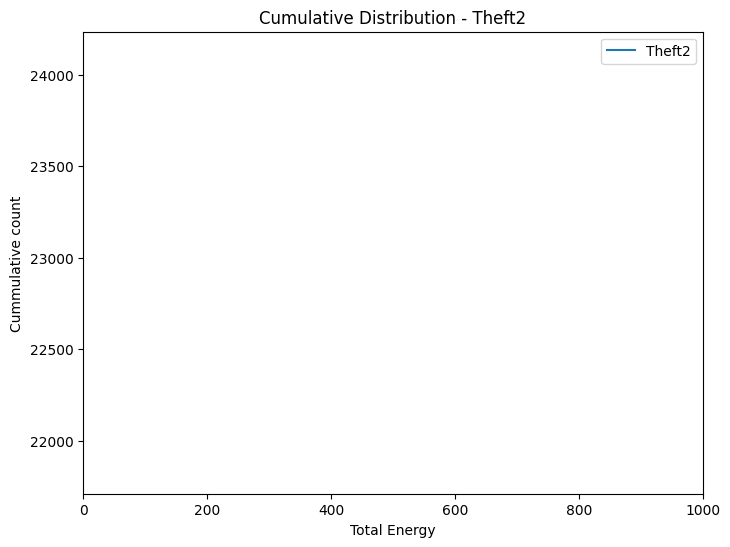

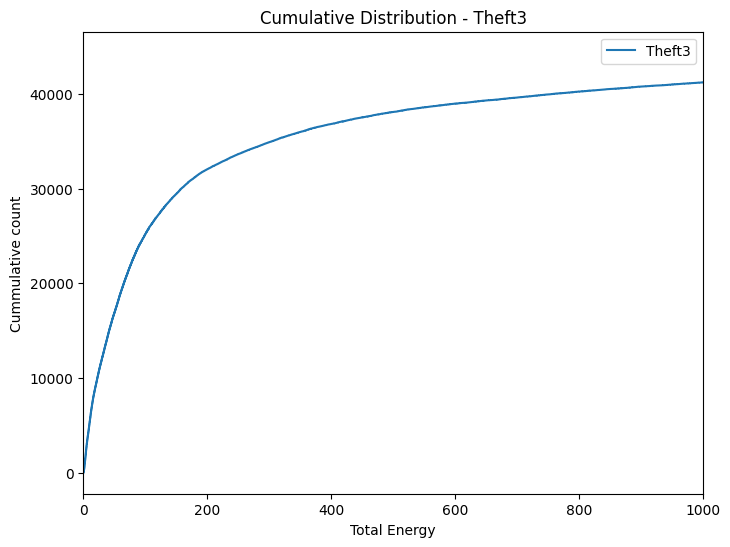

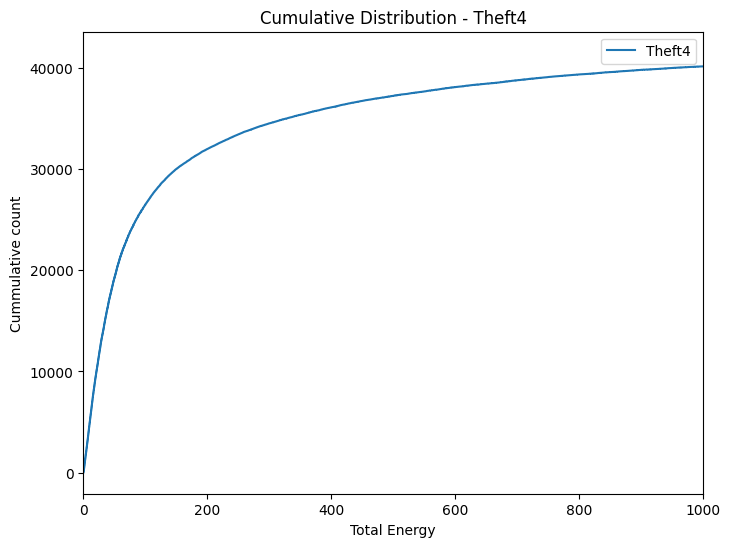

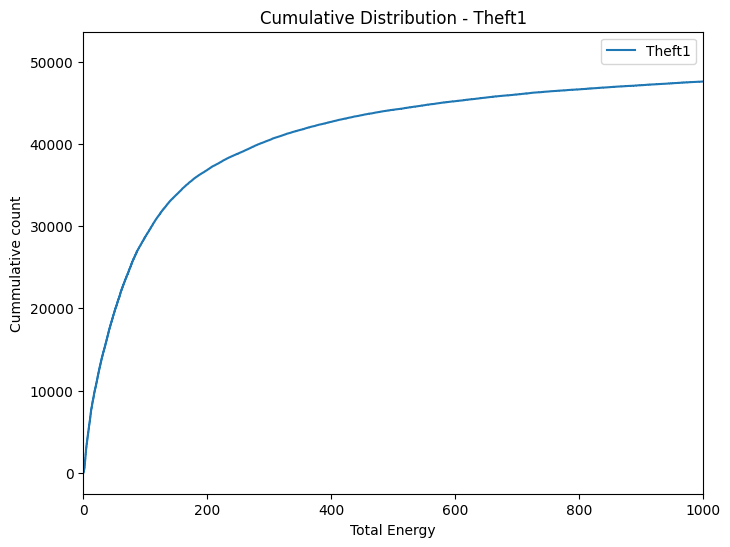

In [ ]:
for theft in df['theft'].unique():
    df_temp = df[df['theft'] == theft]

    # Create a cumulative distribution plot
    plt.figure(figsize=(8, 6))

    # Compute the empirical cumulative distribution function (ECDF)
    ecdf = sm.distributions.ECDF(df_temp['total'])

    # Calculate the counts instead of probabilities
    x = np.linspace(min(df_temp['total']), max(df_temp['total']), num=len(df_temp['total']))
    y = ecdf(x) * len(df_temp['total'])

    plt.step(x, y, label=theft)

    # Set x-axis range
    min_value, max_value = 0, 1000
    plt.xlim(min_value, max_value)

    # Add labels and title
    plt.xlabel('Total Energy')
    plt.ylabel('Cummulative count')
    plt.title(f'Cumulative Distribution - {theft}')
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
# # Time Series Analysis
# for column in df.columns[1:11]:  # Assuming the first column is '0'
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(x=df['0'], y=df[column], hue=df['theft'])
#     plt.title(f'Time Series Analysis - {column}')
#     plt.show()

<ipython-input-19-b51a9dca794a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


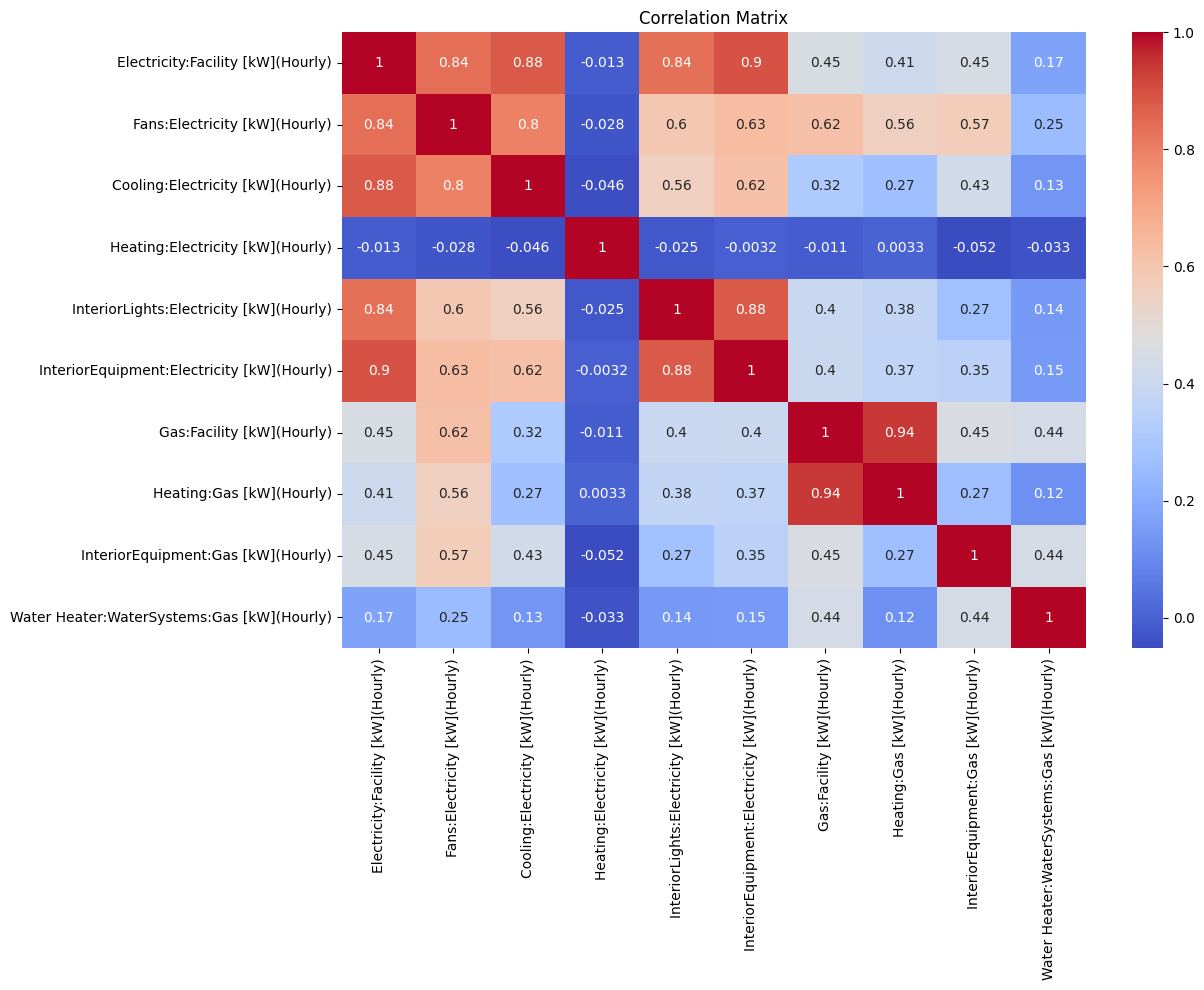

In [ ]:
df1= df.drop(['0', 'total'], axis=1)
df1['theft'].map({'Normal': 0, 'Theft5': 1, 'Theft6': 2, 'Theft2': 3, 'Theft3': 4, 'Theft4': 5, 'Theft1': 6})
corr_matrix = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

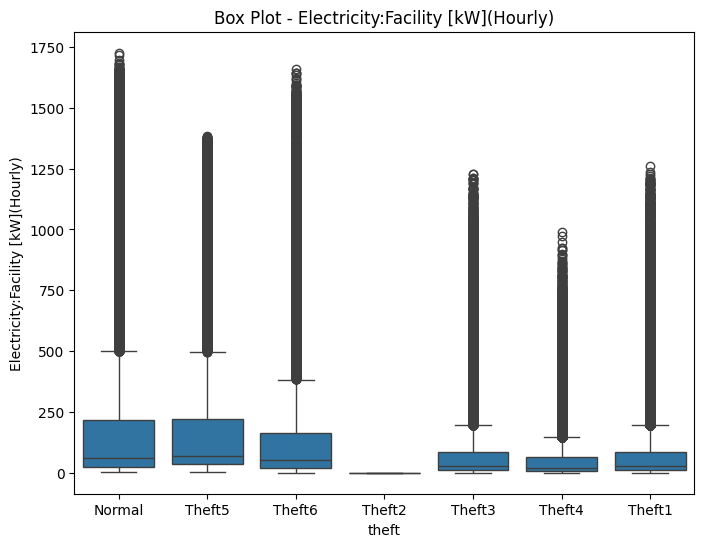

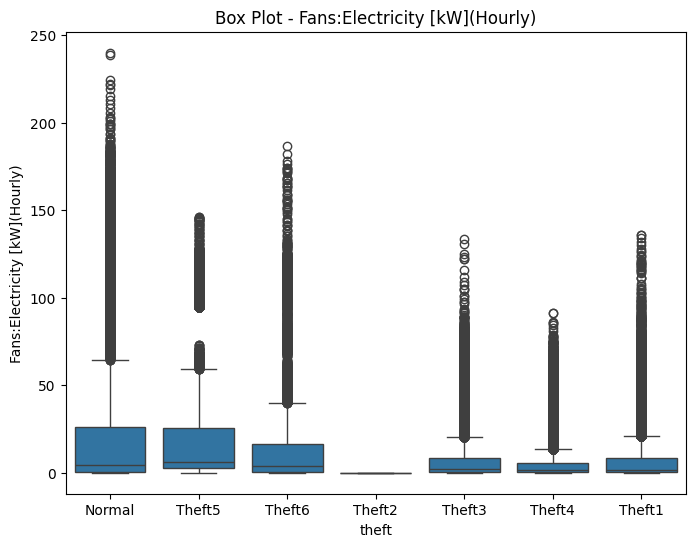

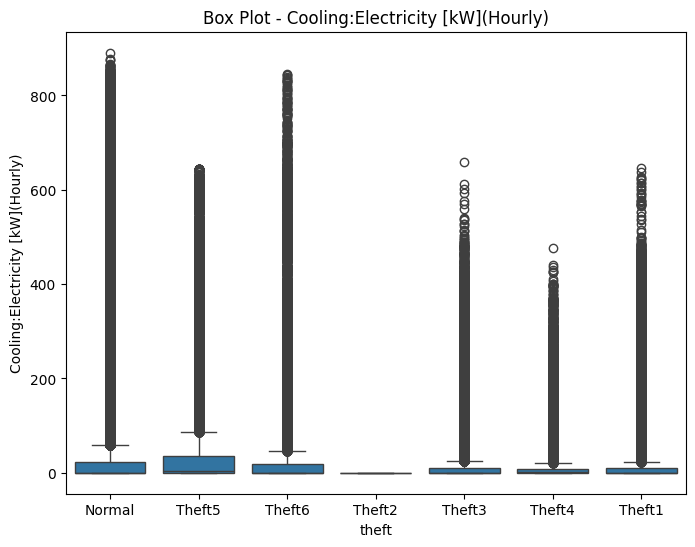

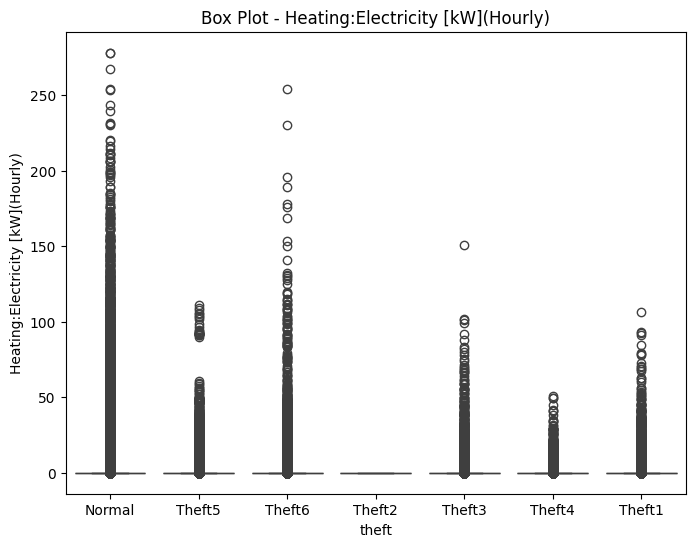

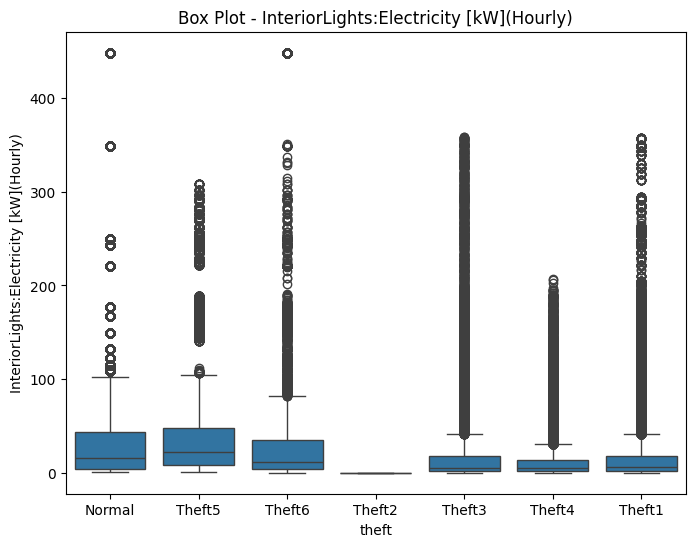

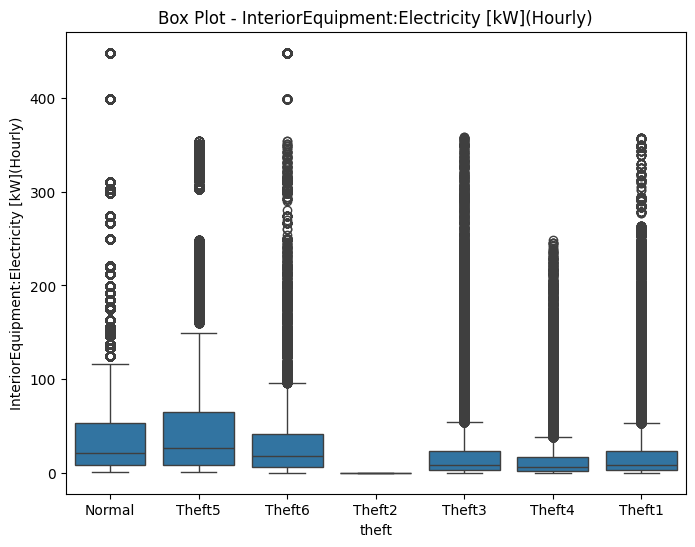

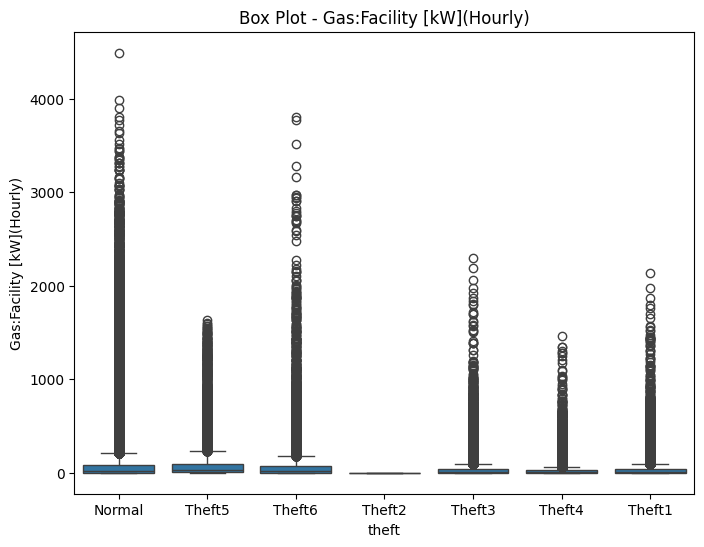

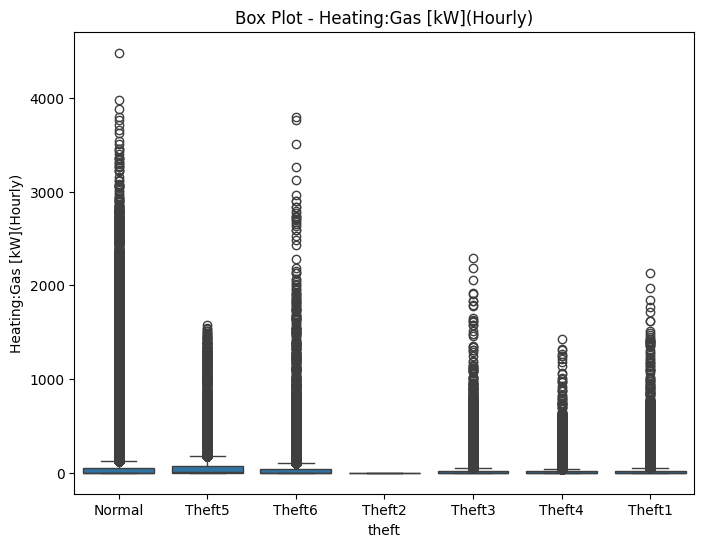

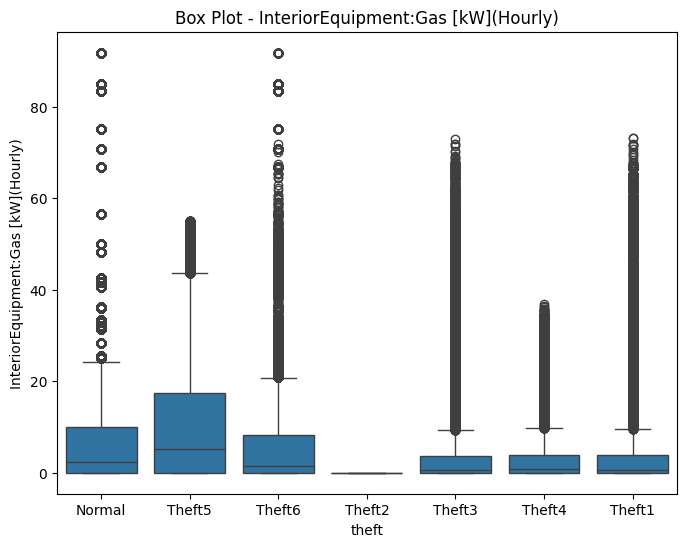

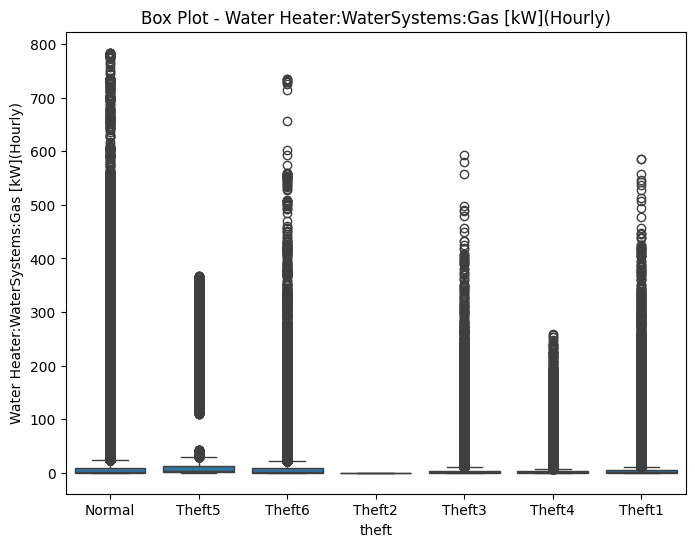

In [ ]:
for column in df.columns[1:11]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['theft'], y=df[column])
    plt.title(f'Box Plot - {column}')
    plt.show()

In [ ]:
# for column in df.columns[1:11]:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(data=df, x=column, hue='theft', kde=True)
#     plt.title(f'Histogram - {column}')
#     plt.show()

In [ ]:
df = df[['0', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)', 'Class', 'theft']]

In [ ]:
X = df.iloc[:, 1:11]  # Features
y = df['theft']  # Target variable

# Map labels to numerical values
label_mapping = {'Normal': 0, 'Theft5': 1, 'Theft6': 2, 'Theft2': 3, 'Theft3': 4, 'Theft4': 5, 'Theft1': 6}
y = y.map(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

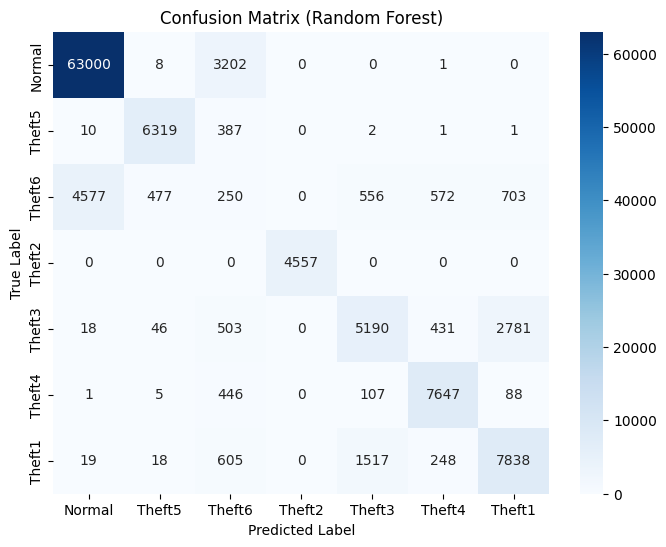


Classification Report: (Random Forest)
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     66211
           1       0.92      0.94      0.93      6720
           2       0.05      0.04      0.04      7135
           3       1.00      1.00      1.00      4557
           4       0.70      0.58      0.64      8969
           5       0.86      0.92      0.89      8294
           6       0.69      0.77      0.72     10245

    accuracy                           0.85    112131
   macro avg       0.74      0.74      0.74    112131
weighted avg       0.83      0.85      0.84    112131



In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report: (Random Forest)\n", classification_report(y_test, y_pred))

In [ ]:
# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print("\nFeature Importance:\n", feature_importance)


Feature Importance:
 InteriorLights:Electricity [kW](Hourly)       0.164282
InteriorEquipment:Electricity [kW](Hourly)    0.162225
Electricity:Facility [kW](Hourly)             0.145809
Water Heater:WaterSystems:Gas [kW](Hourly)    0.132815
Fans:Electricity [kW](Hourly)                 0.116781
InteriorEquipment:Gas [kW](Hourly)            0.085298
Gas:Facility [kW](Hourly)                     0.074252
Cooling:Electricity [kW](Hourly)              0.057165
Heating:Gas [kW](Hourly)                      0.047424
Heating:Electricity [kW](Hourly)              0.013949
dtype: float64


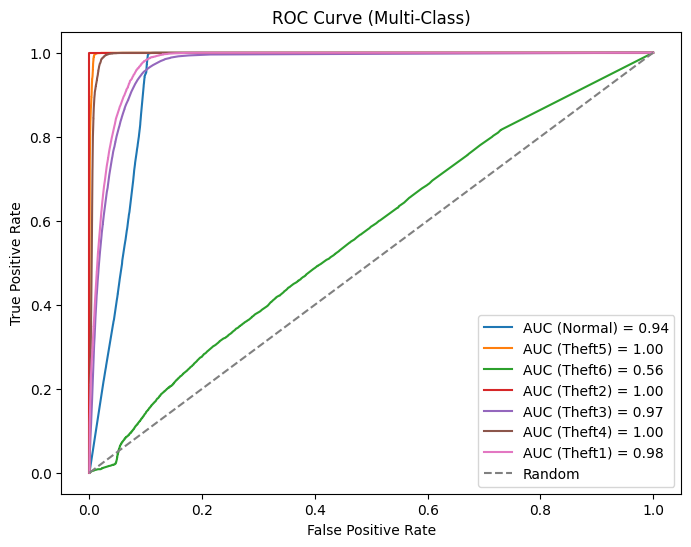

In [ ]:
y_probs = rf_model.predict_proba(X_test)

# Convert test labels to one-hot encoding
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

plt.figure(figsize=(8, 6))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], label=f'AUC ({reverse_label_mapping[i]}) = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-Class)')
plt.legend()
plt.show()

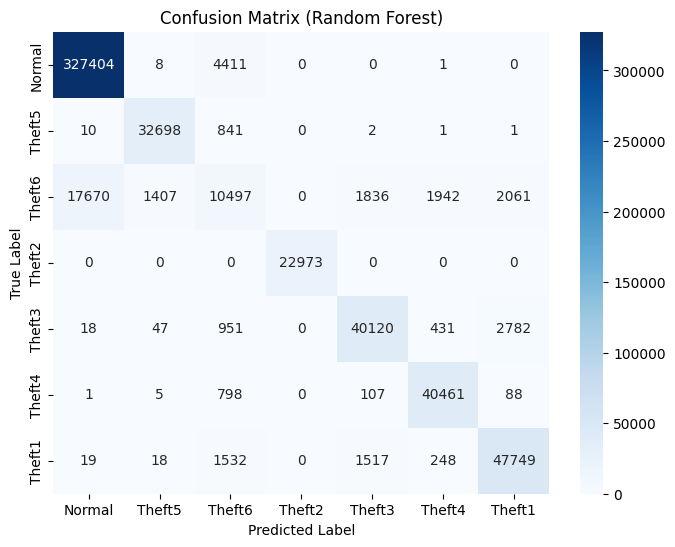


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    331824
           1       0.96      0.97      0.97     33553
           2       0.55      0.30      0.39     35413
           3       1.00      1.00      1.00     22973
           4       0.92      0.90      0.91     44349
           5       0.94      0.98      0.96     41460
           6       0.91      0.93      0.92     51083

    accuracy                           0.93    560655
   macro avg       0.89      0.87      0.87    560655
weighted avg       0.92      0.93      0.92    560655



In [ ]:
y_pred = rf_model.predict(X)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y, y_pred)
# print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report (Random Forest):\n", classification_report(y, y_pred))

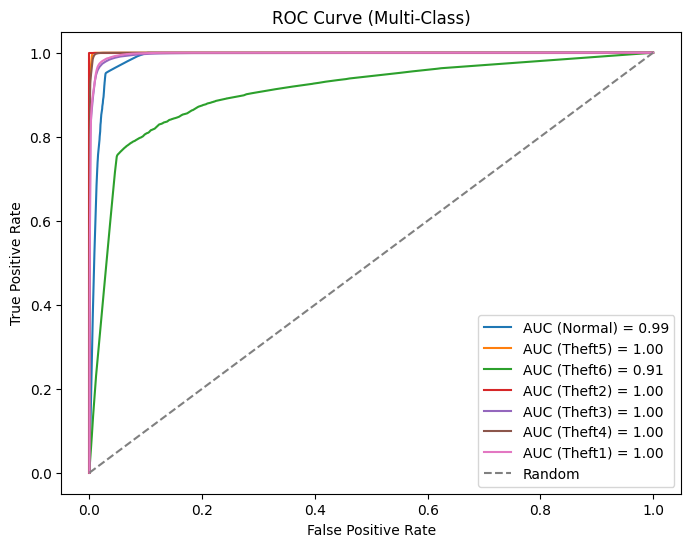

In [ ]:
y_probs = rf_model.predict_proba(X)

# Convert test labels to one-hot encoding
y_test_bin = label_binarize(y, classes=np.unique(y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

plt.figure(figsize=(8, 6))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], label=f'AUC ({reverse_label_mapping[i]}) = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-Class)')
plt.legend()
plt.show()

In [ ]:
# svm_model = SVC(random_state=42)
# svm_model.fit(X_train, y_train)

# # Predictions and evaluation for SVM
# y_pred_svm = svm_model.predict(X_test)

# # Confusion Matrix (SVM)
# conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# # Plot Confusion Matrix as a Heatmap (SVM)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix (SVM)')
# plt.show()

# print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

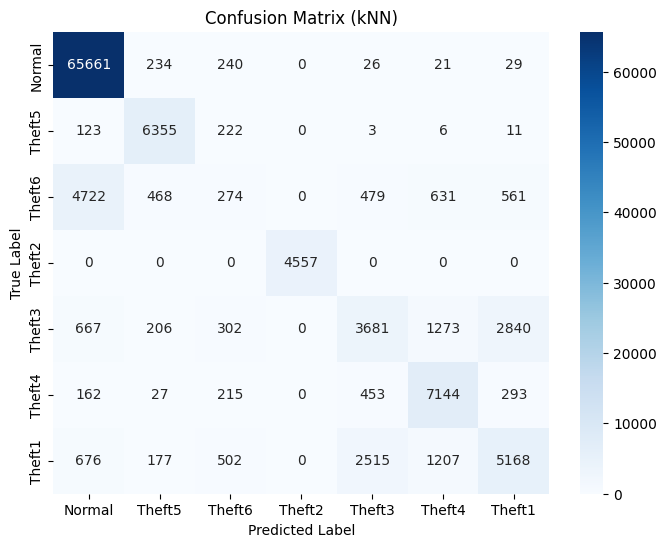


Classification Report (kNN):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     66211
           1       0.85      0.95      0.90      6720
           2       0.16      0.04      0.06      7135
           3       1.00      1.00      1.00      4557
           4       0.51      0.41      0.46      8969
           5       0.69      0.86      0.77      8294
           6       0.58      0.50      0.54     10245

    accuracy                           0.83    112131
   macro avg       0.67      0.68      0.67    112131
weighted avg       0.79      0.83      0.80    112131



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)

# Predictions and evaluation for kNN
y_pred_knn = knn_model.predict(X_test)

# Confusion Matrix (kNN)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix as a Heatmap (kNN)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (kNN)')
plt.show()

# Classification Report (kNN)
print("\nClassification Report (kNN):\n", classification_report(y_test, y_pred_knn))

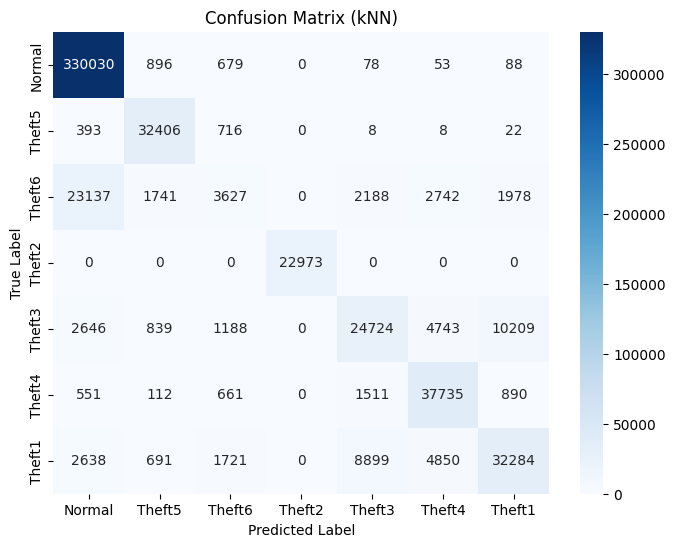


Classification Report (kNN):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95    331824
           1       0.88      0.97      0.92     33553
           2       0.42      0.10      0.16     35413
           3       1.00      1.00      1.00     22973
           4       0.66      0.56      0.60     44349
           5       0.75      0.91      0.82     41460
           6       0.71      0.63      0.67     51083

    accuracy                           0.86    560655
   macro avg       0.76      0.74      0.73    560655
weighted avg       0.84      0.86      0.84    560655



In [ ]:
y_pred_knn = knn_model.predict(X)

# Confusion Matrix (kNN)
conf_matrix_knn = confusion_matrix(y, y_pred_knn)

# Plot Confusion Matrix as a Heatmap (kNN)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (kNN)')
plt.show()

# Classification Report (kNN)
print("\nClassification Report (kNN):\n", classification_report(y, y_pred_knn))

In [ ]:
# lr_model = LogisticRegression(random_state=42, max_iter=10000)
# lr_model.fit(X_train, y_train)

# # Predictions and evaluation for Logistic Regression
# y_pred_lr = lr_model.predict(X_test)

# # Confusion Matrix (Logistic Regression)
# conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# # Plot Confusion Matrix as a Heatmap (Logistic Regression)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix (Logistic Regression)')
# plt.show()

# # Classification Report (Logistic Regression)
# print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

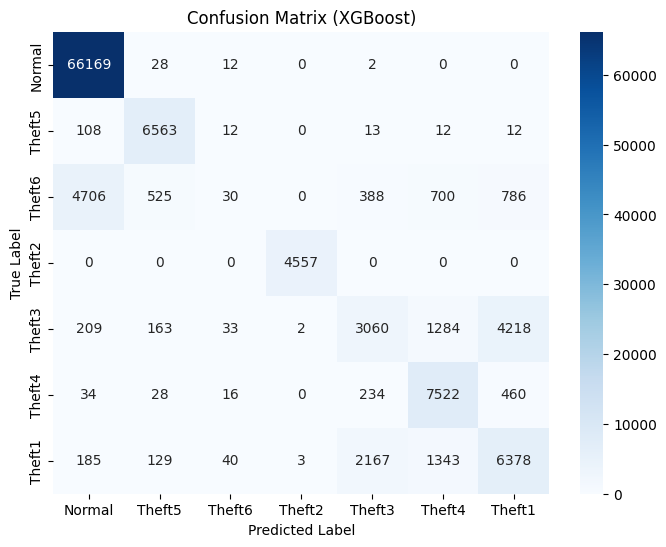

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     66211
           1       0.88      0.98      0.93      6720
           2       0.21      0.00      0.01      7135
           3       1.00      1.00      1.00      4557
           4       0.52      0.34      0.41      8969
           5       0.69      0.91      0.79      8294
           6       0.54      0.62      0.58     10245

    accuracy                           0.84    112131
   macro avg       0.68      0.69      0.67    112131
weighted avg       0.80      0.84      0.81    112131



In [ ]:
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]

# Machine Learning Model (XGBoost)
X = df.iloc[:, 1:11]  # Features
y = df['theft']  # Target variable

# Map labels to numerical values
label_mapping = {'Normal': 0, 'Theft5': 1, 'Theft6': 2, 'Theft2': 3, 'Theft3': 4, 'Theft4': 5, 'Theft1': 6}
y = y.map(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model (XGBoost)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation for XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Confusion Matrix (XGBoost)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot Confusion Matrix as a Heatmap (XGBoost)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# Classification Report (XGBoost)
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

In [ ]:
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance_xgb.sort_values(ascending=False, inplace=True)
print("\nFeature Importance (XGBoost):\n", feature_importance_xgb)


Feature Importance (XGBoost):
 InteriorEquipment_Electricity__kW__Hourly_    0.177206
Water_Heater_WaterSystems_Gas__kW__Hourly_    0.169764
InteriorLights_Electricity__kW__Hourly_       0.159016
InteriorEquipment_Gas__kW__Hourly_            0.150815
Fans_Electricity__kW__Hourly_                 0.096294
Heating_Gas__kW__Hourly_                      0.058775
Cooling_Electricity__kW__Hourly_              0.053907
Electricity_Facility__kW__Hourly_             0.052124
Heating_Electricity__kW__Hourly_              0.045097
Gas_Facility__kW__Hourly_                     0.037003
dtype: float32


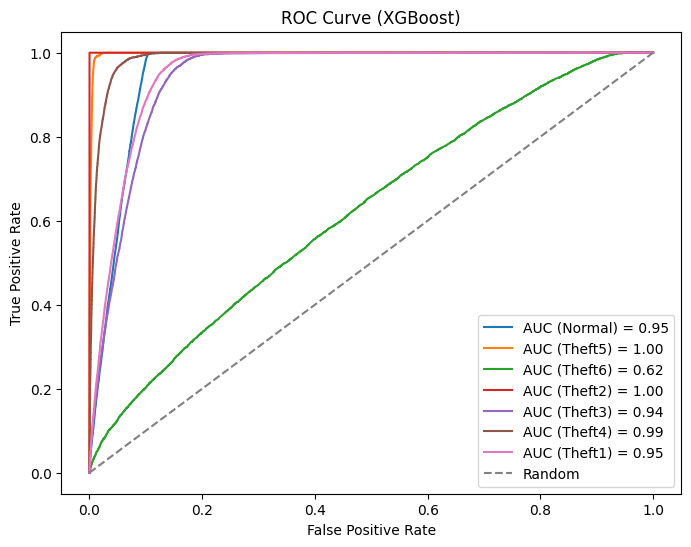

In [ ]:
y_probs_xgb = xgb_model.predict_proba(X_test)

# Convert test labels to one-hot encoding
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], label=f'AUC ({list(label_mapping.keys())[i]}) = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.show()

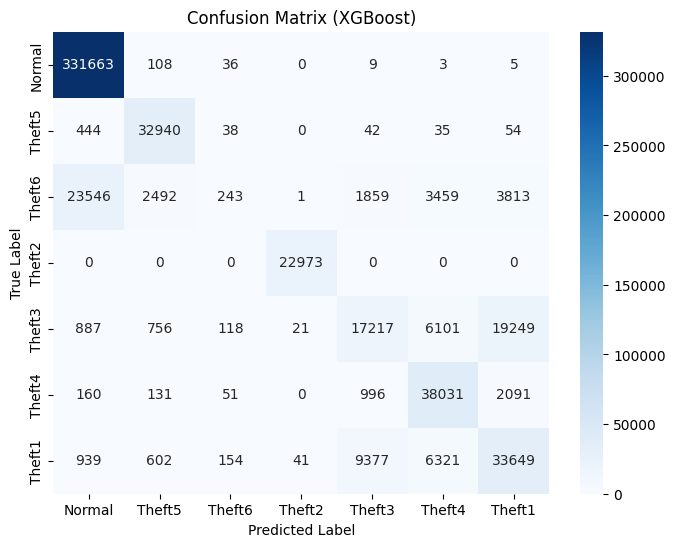

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    331824
           1       0.89      0.98      0.93     33553
           2       0.38      0.01      0.01     35413
           3       1.00      1.00      1.00     22973
           4       0.58      0.39      0.47     44349
           5       0.70      0.92      0.80     41460
           6       0.57      0.66      0.61     51083

    accuracy                           0.85    560655
   macro avg       0.72      0.71      0.68    560655
weighted avg       0.82      0.85      0.82    560655



In [ ]:
y_pred_xgb = xgb_model.predict(X)

# Confusion Matrix (XGBoost)
conf_matrix_xgb = confusion_matrix(y, y_pred_xgb)

# Plot Confusion Matrix as a Heatmap (XGBoost)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# Classification Report (XGBoost)
print("Classification Report (XGBoost):\n", classification_report(y, y_pred_xgb))

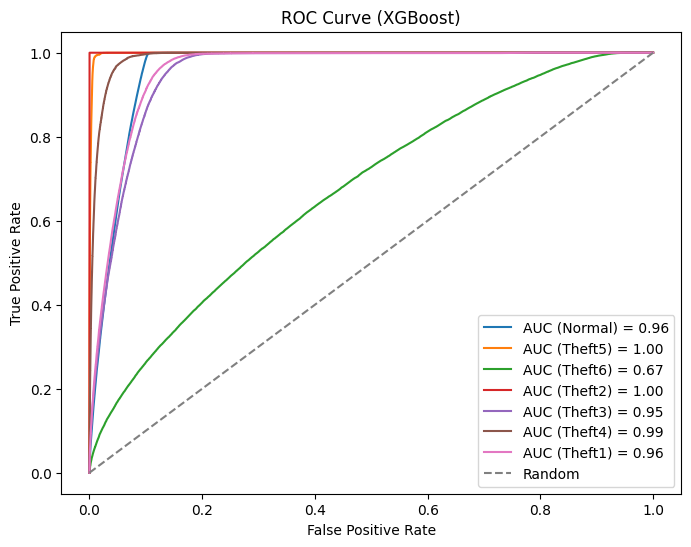

In [ ]:
y_probs_xgb = xgb_model.predict_proba(X)

# Convert test labels to one-hot encoding
y_test_bin = label_binarize(y, classes=np.unique(y))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], label=f'AUC ({list(label_mapping.keys())[i]}) = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.show()

In [ ]:
df.head()

,0,Electricity_Facility__kW__Hourly_,Fans_Electricity__kW__Hourly_,Cooling_Electricity__kW__Hourly_,Heating_Electricity__kW__Hourly_,InteriorLights_Electricity__kW__Hourly_,InteriorEquipment_Electricity__kW__Hourly_,Gas_Facility__kW__Hourly_,Heating_Gas__kW__Hourly_,InteriorEquipment_Gas__kW__Hourly_,Water_Heater_WaterSystems_Gas__kW__Hourly_,Class,theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal


In [ ]:
df['new theft'] = np.where(df['theft'] == 'Theft6', 'Theft', 'Normal')
df.head()

,0,Electricity_Facility__kW__Hourly_,Fans_Electricity__kW__Hourly_,Cooling_Electricity__kW__Hourly_,Heating_Electricity__kW__Hourly_,InteriorLights_Electricity__kW__Hourly_,InteriorEquipment_Electricity__kW__Hourly_,Gas_Facility__kW__Hourly_,Heating_Gas__kW__Hourly_,InteriorEquipment_Gas__kW__Hourly_,Water_Heater_WaterSystems_Gas__kW__Hourly_,Class,theft,new theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,Normal


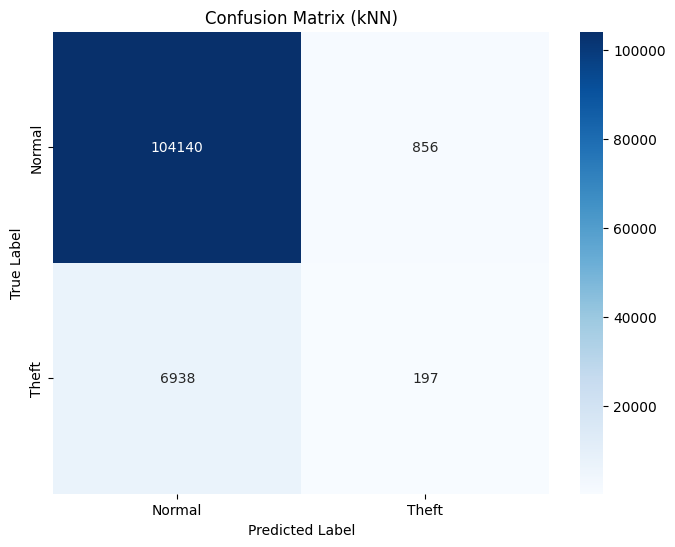

Classification Report (kNN):
               precision    recall  f1-score   support

      Normal       0.94      0.99      0.96    104996
       Theft       0.19      0.03      0.05      7135

    accuracy                           0.93    112131
   macro avg       0.56      0.51      0.51    112131
weighted avg       0.89      0.93      0.91    112131



In [ ]:
X = df.iloc[:, 1:11]  # Features
y = df['new theft']  # Target variable

label_mapping = {'Normal' : 0, 'Theft': 1}
y.map(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Model (kNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train_scaled, y_train)

# Predictions and evaluation for kNN
y_pred_knn = knn_model.predict(X_test_scaled)

# Confusion Matrix (kNN)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix as a Heatmap (kNN)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (kNN)')
plt.show()

# Classification Report (kNN)
print("Classification Report (kNN):\n", classification_report(y_test, y_pred_knn))

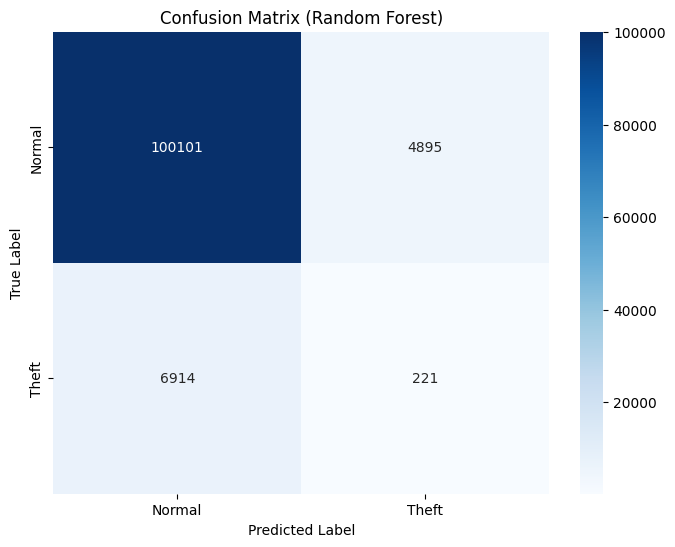

Classification Report (Random Forest):
               precision    recall  f1-score   support

      Normal       0.94      0.95      0.94    104996
       Theft       0.04      0.03      0.04      7135

    accuracy                           0.89    112131
   macro avg       0.49      0.49      0.49    112131
weighted avg       0.88      0.89      0.89    112131



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions and evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix as a Heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Classification Report for Random Forest
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

8th Semester

In [ ]:
X = df.iloc[:, 1:11]  # Features
y = df['theft']  # Target variable

# Map labels to numerical values
label_mapping = {'Normal': 0, 'Theft5': 1, 'Theft6': 2, 'Theft2': 3, 'Theft3': 4, 'Theft4': 5, 'Theft1': 6}
y = y.map(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

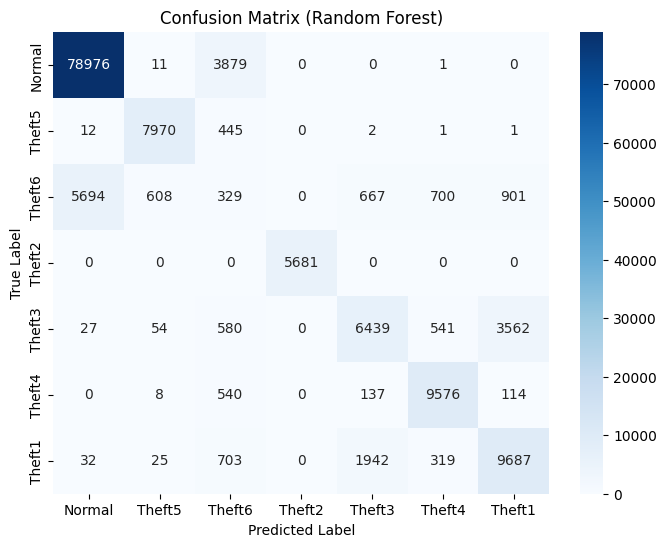


Classification Report: (Random Forest)
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     82867
           1       0.92      0.95      0.93      8431
           2       0.05      0.04      0.04      8899
           3       1.00      1.00      1.00      5681
           4       0.70      0.57      0.63     11203
           5       0.86      0.92      0.89     10375
           6       0.68      0.76      0.72     12708

    accuracy                           0.85    140164
   macro avg       0.73      0.74      0.74    140164
weighted avg       0.83      0.85      0.84    140164



In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report: (Random Forest)\n", classification_report(y_test, y_pred))

In [ ]:
X = df.iloc[:, 1:11]  # Features
y = df['theft']  # Target variable

# Map labels to numerical values
label_mapping = {'Normal': 0, 'Theft5': 1, 'Theft6': 2, 'Theft2': 3, 'Theft3': 4, 'Theft4': 5, 'Theft1': 6}
y = y.map(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

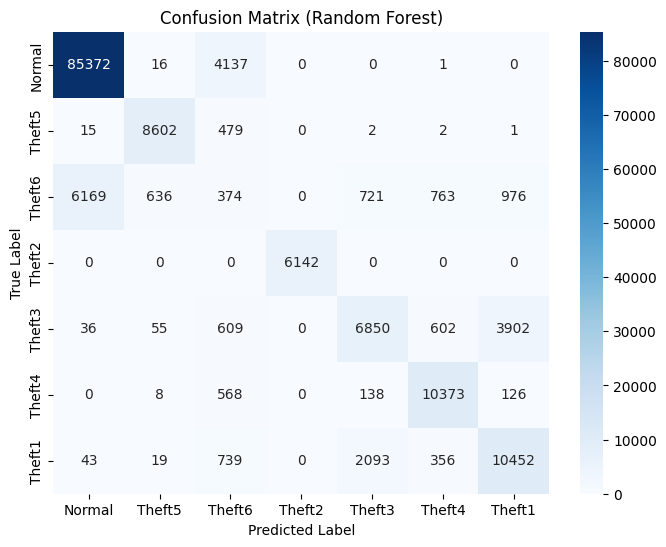


Classification Report: (Random Forest)
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     89526
           1       0.92      0.95      0.93      9101
           2       0.05      0.04      0.05      9639
           3       1.00      1.00      1.00      6142
           4       0.70      0.57      0.63     12054
           5       0.86      0.93      0.89     11213
           6       0.68      0.76      0.72     13702

    accuracy                           0.85    151377
   macro avg       0.73      0.74      0.74    151377
weighted avg       0.83      0.85      0.84    151377



In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report: (Random Forest)\n", classification_report(y_test, y_pred))